/Users/jelle/miniconda3/envs/spock/lib/python3.12/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,ID,Prediction (active),SMILES,Structure
403746,m_282151____27581714____25166186____25245126,0.999966,CCC(C)(CO)CN(CC1=NN(C)C(Cl)=C1)C(=O)C1CCC2=C1N...,
256865,s_22____15608508____27320962,0.999960,CN1C=C(C2=NOC=C2C(=O)N2CCC3=C(C2)C(CO)=NN3)C=N1,
264835,m_275592____14114816____14138966____15859574,0.999959,CN(C(=O)C1=CC(=O)NN=C1)C1CCN(C(=O)C2=NOC(CO)=C...,
215683,m_274552____23521742____13185074____15984254,0.999957,C=C1CCN(C(=O)C2=CC(=O)NN=C2)C(C(=O)NC(CC)CO)C1,
439642,m_275592____20026922____25317784____15859720,0.999954,CC1=CC=CC(C(CNC(=O)C2=CN=CC3=C2C=NN3)NC(=O)C2C...,
...,...,...,...,...
155346,s_27____635892____27407726,0.900001,CC1=C(Cl)C(NCC(O)C2=CC=CO2)=CC=C1[N+](=O)[O-],
331554,m_275592____21824102____14139886____14132322,0.900001,CCN(C[C@H]1CCCCN1C(=O)C1=C2C=C(C)C=CN2N=C1)C(=...,
97239,m_274552____23521612____25004162____15983006,0.900001,CC(C)[C@@H]1CN(C(=O)C2CCN(C)CC2)C[C@H]1C(=O)NC...,
74205,m_282151____25221492____25173864____25237508,0.900000,CCCC(CCN(CC1=NC(N(C)C)=NC=C1)C(=O)C#CC1(C)COC1...,

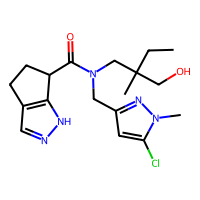
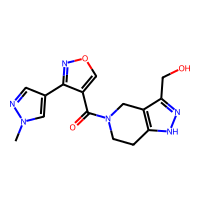
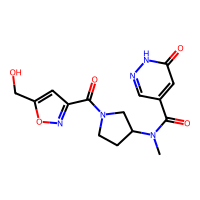
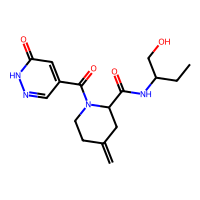
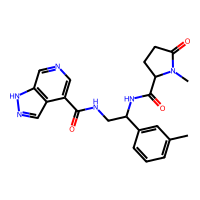
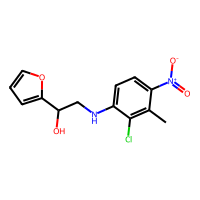
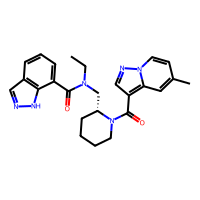
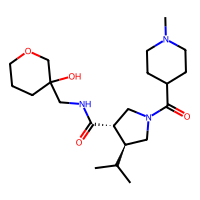
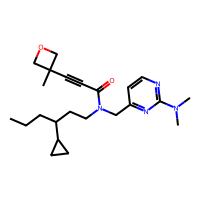
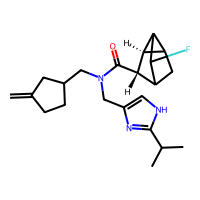

In [1]:
import pandas as pd
from rdkit.Chem import PandasTools
import os

# Directory containing the prediction files
directory = './data/Predictions'
# initiate an empty dataframe  
df = pd.DataFrame()

# add all predictions with Prediction (active) > 0.9 to the dataframe
for filename in os.listdir(directory):
    if filename.startswith("Preds_"):
        df_temp = pd.read_csv(os.path.join(directory, filename))
        df_temp = df_temp[df_temp['Prediction (active)'] > 0.9]
        df = pd.concat([df, df_temp])
        df = df.reset_index(drop=True)

# sort the dataframe by 'Prediction (active)' in descending order
df = df.sort_values(by='Prediction (active)', ascending=False)

# organize columns in dataframe
df = df[['ID', 'Prediction (active)', 'SMILES']]

# add Structure column and add 2d structure to the dataframe
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES', molCol='Structure')
df

In [ ]:
# save the datafram to a csv file
df.to_csv('./Enamine_predictions.csv', index=False)